In [1]:
import sys 
import pandas as pd 
import numpy as np 
from scipy import stats 
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer 
from sklearn.impute import KNNImputer
from impyute.imputation.cs import mice 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest



In [2]:
#Load DataA.csv 
dataA = pd.read_csv('~/Documents/Uwaterloo_Study_Docs/657A_ECE/Assignments/ece_657a_assignments/Assignment_1/Datasets/DataA.csv')

In [3]:
print("\n dataA: \n", dataA)


 dataA: 
        Unnamed: 0  fea.1  fea.2  fea.3  fea.4   fea.5  fea.6  fea.7  fea.8  \
0               1 -153.0  414.0  939.0 -161.0  1007.0   99.0 -210.0  948.0   
1               2 -150.0  420.0  939.0 -177.0  1008.0  103.0 -207.0  939.0   
2               3 -160.0  432.0  941.0 -162.0   982.0   98.0 -198.0  936.0   
3               4 -171.0  432.0  911.0 -174.0   999.0  115.0 -187.0  918.0   
4               5 -171.0    NaN  929.0 -189.0  1004.0  104.0 -198.0  939.0   
...           ...    ...    ...    ...    ...     ...    ...    ...    ...   
18995       18996    NaN    NaN    NaN    NaN     NaN    NaN    NaN    NaN   
18996       18997    NaN    NaN    NaN    NaN     NaN    NaN    NaN    NaN   
18997       18998    NaN    NaN    NaN    NaN     NaN    NaN    NaN    NaN   
18998       18999    NaN    NaN    NaN    NaN     NaN    NaN    NaN    NaN   
18999       19000    NaN    NaN    NaN    NaN     NaN    NaN    NaN    NaN   

       fea.9  ...  fea.72  fea.73  fea.74  fea.75  f

#### As we can see in the above dataset there are many missing values in each of the column. 

In [4]:
# Display all columns
pd.set_option('display.max_columns', None)

## Shape of the Dataset

In [5]:
print("\n Dimension of DataA: ",dataA.shape)


 Dimension of DataA:  (19000, 82)


#### The Dataset has 19000 samples and 82 features. However there is a Unamed column 'Unnamed' which is just the count which needs to be removed from the dataset 

## Checking all the Columns

In [6]:
# Columns of DataA
print(" \n Columns of DataA: \n",dataA.columns)


 Columns of DataA: 
 Index(['Unnamed: 0', 'fea.1', 'fea.2', 'fea.3', 'fea.4', 'fea.5', 'fea.6',
       'fea.7', 'fea.8', 'fea.9', 'fea.10', 'fea.11', 'fea.12', 'fea.13',
       'fea.14', 'fea.15', 'fea.16', 'fea.17', 'fea.18', 'fea.19', 'fea.20',
       'fea.21', 'fea.22', 'fea.23', 'fea.24', 'fea.25', 'fea.26', 'fea.27',
       'fea.28', 'fea.29', 'fea.30', 'fea.31', 'fea.32', 'fea.33', 'fea.34',
       'fea.35', 'fea.36', 'fea.37', 'fea.38', 'fea.39', 'fea.40', 'fea.41',
       'fea.42', 'fea.43', 'fea.44', 'fea.45', 'fea.46', 'fea.47', 'fea.48',
       'fea.49', 'fea.50', 'fea.51', 'fea.52', 'fea.53', 'fea.54', 'fea.55',
       'fea.56', 'fea.57', 'fea.58', 'fea.59', 'fea.60', 'fea.61', 'fea.62',
       'fea.63', 'fea.64', 'fea.65', 'fea.66', 'fea.67', 'fea.68', 'fea.69',
       'fea.70', 'fea.71', 'fea.72', 'fea.73', 'fea.74', 'fea.75', 'fea.76',
       'fea.77', 'fea.78', 'fea.79', 'fea.80', 'fea.81'],
      dtype='object')


#### Removing 'Unnamed' columns from the dataset  

In [7]:
dataA_updated = dataA.drop(['Unnamed: 0'], axis=1)
print("Updated Dataset after removal of 'Unnamed: 0' column: \n", dataA_updated.head(20))

Updated Dataset after removal of 'Unnamed: 0' column: 
    fea.1  fea.2  fea.3  fea.4   fea.5  fea.6  fea.7   fea.8  fea.9  fea.10  \
0  -153.0  414.0  939.0 -161.0  1007.0   99.0 -210.0   948.0  333.0   -19.0   
1  -150.0  420.0  939.0 -177.0  1008.0  103.0 -207.0   939.0  316.0     9.0   
2  -160.0  432.0  941.0 -162.0   982.0   98.0 -198.0   936.0  315.0   -10.0   
3  -171.0  432.0  911.0 -174.0   999.0  115.0 -187.0   918.0  338.0    34.0   
4  -171.0    NaN  929.0 -189.0  1004.0  104.0 -198.0   939.0  350.0    60.0   
5  -171.0  432.0  924.0 -179.0  1011.0   85.0 -204.0   945.0  336.0    94.0   
6  -169.0  429.0  949.0 -175.0  1007.0  102.0 -188.0   914.0  322.0   154.0   
7  -160.0  423.0  927.0 -195.0   996.0  123.0 -213.0   925.0  302.0   128.0   
8  -163.0  432.0  929.0 -178.0   994.0  101.0 -186.0   946.0  296.0   166.0   
9  -156.0  415.0  936.0 -186.0  1014.0  111.0 -195.0   960.0  280.0   202.0   
10 -153.0  413.0  923.0 -187.0   993.0   91.0 -193.0   970.0  282.0   233.0 

In [8]:
# Dimension of the updated Dataset
print("\n Dimension of Updated DataA: ",dataA_updated.shape)


 Dimension of Updated DataA:  (19000, 81)


#### The Column 'Unnamed: 0' has been removed from the dataset as we can see in the above data and now the dimension of the dataset has become (19000, 81) which means it has 19000 samples and 81 features in total

## Identifying Missing Values in the Dataset 


In [9]:
# Missing Values in the Dataset
print("\n Missing values in the DataA: \n",dataA_updated.isnull())


 Missing values in the DataA: 
        fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  fea.9  fea.10  \
0      False  False  False  False  False  False  False  False  False   False   
1      False  False  False  False  False  False  False  False  False   False   
2      False  False  False  False  False  False  False  False  False   False   
3      False  False  False  False  False  False  False  False  False   False   
4      False   True  False  False  False  False  False  False  False   False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
18995   True   True   True   True   True   True   True   True   True    True   
18996   True   True   True   True   True   True   True   True   True    True   
18997   True   True   True   True   True   True   True   True   True    True   
18998   True   True   True   True   True   True   True   True   True    True   
18999   True   True   True   True   True   True   True   True   True    True   

      

#### Here We can see in the dataset there are many missing value in the Dataset 

## Number of Missing values per columns

In [10]:
# Find the Total number of missing values in each column
print("\n Number of missing values in each Column: ", dataA_updated.isnull().sum())


 Number of missing values in each Column:  fea.1     1187
fea.2     1188
fea.3     1187
fea.4      800
fea.5      800
          ... 
fea.77     773
fea.78     773
fea.79     773
fea.80     773
fea.81     773
Length: 81, dtype: int64


#### As we can see from the above table that the dataset contains too many missing values and each feature has different number of missing values. As from the table it is clear that feature.1 has 1187 missing values, feature.2 has 1188 missing values while from feature.37 to feature.81 all have a missing value of 773 which is the lowest value missing among all the features. Whereas feature.34 to feature.36 have 18999 missing values which highest among all the features in the entire dataset. 

## Total number of Missing values in the dataset

In [11]:
print("\n Total number of Missing values in the dataset: ", dataA_updated.isnull().sum().sum())


 Total number of Missing values in the dataset:  124053


#### In total there are 124053 missing values in the dataset

## Statistical Description of the Dataset with missing values

In [12]:
# Statistical analysis of the Dataset
dataA_updated.describe()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.34,fea.35,fea.36,fea.37,fea.38,fea.39,fea.40,fea.41,fea.42,fea.43,fea.44,fea.45,fea.46,fea.47,fea.48,fea.49,fea.50,fea.51,fea.52,fea.53,fea.54,fea.55,fea.56,fea.57,fea.58,fea.59,fea.60,fea.61,fea.62,fea.63,fea.64,fea.65,fea.66,fea.67,fea.68,fea.69,fea.70,fea.71,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
count,17813.000000,17812.000000,17813.000000,18200.000000,18200.000000,18200.000000,18099.000000,18099.000000,18099.000000,18043.000000,18044.000000,18044.000000,17950.000000,17950.000000,17950.000000,18202.000000,18202.000000,18202.000000,17964.000000,17964.000000,17964.000000,17677.000000,17677.000000,17677.000000,18106.000000,18106.000000,18106.000000,18106.000000,18106.000000,18106.000000,18083.000000,18083.000000,18083.000000,1.0,1.0,1.0,18227.000000,18227.000000,18227.000000,18227.00000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.00000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18226.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000,18227.000000
mean,-132.812384,698.264485,597.541402,-307.128462,909.548077,-32.760824,61.974363,899.313498,81.650478,356.638752,330.971569,584.833130,583.589861,421.624290,-38.719833,71.807768,780.358257,-461.605043,274.476843,893.086451,-89.299933,-622.139334,233.764044,-131.400068,-360.661825,875.943278,269.614934,-570.500166,432.334420,427.547277,-124.834707,369.141625,646.348062,0.0,0.0,0.0,-862.982169,-209.995885,209.005047,-0.55736,-7.673890,-9.025347,489.460306,83.230153,209.654194,330.984199,-66.071981,290.883086,6.278762,-817.288473,140.022110,294.320568,13.456027,-9.604268,-8.376420,279.558786,-267.420091,-105.234158,204.50107,-135.484611,197.207714,299.903166,-200.212322,555.226532,443.874637,1.923355,1.402535,-3.169364,-70.556537,-90.936080,-227.353157,-124.658035,-37.973391,137.400176,374.762934,-880.583804,-47.607780,137.641192,-18.099523,4.671257,20.726834
std,284.183187,375.672475,396.654659,183.151634,193.963300,254.001018,317.393784,196.829252,327.904371,343.131382,543.517364,282.078053,307.610433,543.293018,495.913749,258.937246,291.642323,261.243774,298.191766,216.179301,221.071614,359.196753,587.480524,460.080469,223.329186,253.761954,371.407492,307.329729,497.493607,204.477583,369.363351,523.492523,287.282436,NaN,NaN,NaN,204.443034,252.273113,288.117323,622.00637,328.654972,248.500906,344.436164,366.809464,552.049211,521.513609,322.307191,452.056841,470.386277,240.623758,409.226342,229.603664,838.521518,518.143698,560.794366,396.007945,550.994437,385.236647,460.46979,337.120625,421.161877,554.948504,573.494633,339.780793,298.892877,1020.487633,700.587030,867.141376,580.008611,480.162249,379.058945,481.492994,355.841529,352.788441,583.792739,217.634117,373.064609,248.988603,778.015520,480.779966,455.160604
min,-2724.000000,-855.000000,-2196.000000,-1365.000000,-245.000000,-920.000000,-1580.000000,-149.000000,-1624.000000,-1792.000000,-1545.000000,-1079.000000,-1710.000000,-1120.000000,-1634.000000,-1089.000000,-289.000000,-1379.000000,-2269.000000,-786.000000,-1944.000000,-3172.000000,-2324.000000,-2734.000000,-1873.000000,-442.000000,-1430.000000,-1933.000000,-1103.000000,-765.000000,-1717.000000,-1234.000000,-784.000000,0.0,0.0,0.0,-1578.000000,-887.000000,-1067.000000,-3322.00000,-2764.000000,-1293.000000,-767.000000,-985.000000,-975.000000,-876.000000,-705.000000,-702.000000,-983.000000,-1884.000000,-1516.000000,-1671.000000,-12310.000000,-5226.000000,-3541

#### As we can see from the above statistical description of the dataset it clear that the rows of feature.34, feature.35 and feature.36 is entirely missing so there is no statistical value for those columns. We have to remove the entire feature.34, feature.35 and feature.36 from the dataset.

## Drop feature.34, feature.35 and feature.36

In [13]:
dataA_updated_redDim = dataA_updated.drop(['fea.34', 'fea.35', 'fea.36'], axis=1)
print("\n Dimension of Reduced Dataset: ", dataA_updated_redDim.shape)
print("\n Reduced Dataset: \n", dataA_updated_redDim)


 Dimension of Reduced Dataset:  (19000, 78)

 Reduced Dataset: 
        fea.1  fea.2  fea.3  fea.4   fea.5  fea.6  fea.7  fea.8  fea.9  fea.10  \
0     -153.0  414.0  939.0 -161.0  1007.0   99.0 -210.0  948.0  333.0   -19.0   
1     -150.0  420.0  939.0 -177.0  1008.0  103.0 -207.0  939.0  316.0     9.0   
2     -160.0  432.0  941.0 -162.0   982.0   98.0 -198.0  936.0  315.0   -10.0   
3     -171.0  432.0  911.0 -174.0   999.0  115.0 -187.0  918.0  338.0    34.0   
4     -171.0    NaN  929.0 -189.0  1004.0  104.0 -198.0  939.0  350.0    60.0   
...      ...    ...    ...    ...     ...    ...    ...    ...    ...     ...   
18995    NaN    NaN    NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN   
18996    NaN    NaN    NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN   
18997    NaN    NaN    NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN   
18998    NaN    NaN    NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN   
18999    NaN    NaN    NaN    NaN     NaN  

####

#### As it can be seen from the above dataset that the Feature.34, Feature.35 and feature.36 has been dropped from the dataset.

In [14]:
# Total missing value check after removing the Features
print("\n Number of missing values after feature removal: ", dataA_updated_redDim.isnull().sum().sum())


 Number of missing values after feature removal:  67056


#### The dataset still contains 67056 missing values in the other Feature sets. So we will apply Imputation of missing values learned during lectures. 

# Imputing Missing Values
### 1.A Replace missing data by Mean values for each columns

In [15]:
# Using Simple Imputation Technique for replacing the missing values with mean values 
si = SimpleImputer(strategy='mean')
si.fit(dataA_updated_redDim)
dataA_Mean_SiImputation = si.transform(dataA_updated_redDim)


In [16]:
print("\n Data after Mean Imputation: \n", dataA_Mean_SiImputation)


 Data after Mean Imputation: 
 [[-153.          414.          939.         ...  -29.
    36.           24.        ]
 [-150.          420.          939.         ...  -31.
    47.            3.        ]
 [-160.          432.          941.         ...  -38.
    20.            0.        ]
 ...
 [-132.81238421  698.26448462  597.54140235 ...  -18.09952269
     4.67125693   20.72683382]
 [-132.81238421  698.26448462  597.54140235 ...  -18.09952269
     4.67125693   20.72683382]
 [-132.81238421  698.26448462  597.54140235 ...  -18.09952269
     4.67125693   20.72683382]]


### 1.B Using fillna for mean imputation

In [17]:
# Copy data in another variable
data_forMeanImputing = dataA_updated_redDim.copy(deep = True)

In [18]:
# Mean Method for fill na 
data_forMeanImputing.fillna(data_forMeanImputing.mean(), inplace=True)
print("\n Data after Mean imputation: \n",data_forMeanImputing)


 Data after Mean imputation: 
            fea.1       fea.2       fea.3       fea.4        fea.5  \
0     -153.000000  414.000000  939.000000 -161.000000  1007.000000   
1     -150.000000  420.000000  939.000000 -177.000000  1008.000000   
2     -160.000000  432.000000  941.000000 -162.000000   982.000000   
3     -171.000000  432.000000  911.000000 -174.000000   999.000000   
4     -171.000000  698.264485  929.000000 -189.000000  1004.000000   
...           ...         ...         ...         ...          ...   
18995 -132.812384  698.264485  597.541402 -307.128462   909.548077   
18996 -132.812384  698.264485  597.541402 -307.128462   909.548077   
18997 -132.812384  698.264485  597.541402 -307.128462   909.548077   
18998 -132.812384  698.264485  597.541402 -307.128462   909.548077   
18999 -132.812384  698.264485  597.541402 -307.128462   909.548077   

            fea.6       fea.7       fea.8       fea.9      fea.10      fea.11  \
0       99.000000 -210.000000  948.000000  333.

In [19]:
# Check for missing values in the dataset
print("\n Missing Value check in the dataset: ", data_forMeanImputing.isnull().sum().sum())


 Missing Value check in the dataset:  0


In [20]:
# Statistical Table for the Dataset after Mean imputation
print(data_forMeanImputing.describe())

fea.1         fea.2         fea.3         fea.4         fea.5  \
count  19000.000000  19000.000000  19000.000000  19000.000000  19000.000000   
mean    -132.812384    698.264485    597.541402   -307.128462    909.548077   
std      275.162567    363.737566    384.063939    179.254138    189.835729   
min    -2724.000000   -855.000000  -2196.000000  -1365.000000   -245.000000   
25%     -172.000000    366.000000    322.750000   -402.000000    868.000000   
50%     -110.000000    756.000000    597.541402   -277.000000    964.000000   
75%      -20.000000    977.000000    950.000000   -169.000000   1005.000000   
max     1887.000000   2531.000000   2941.000000    609.000000   1833.000000   

              fea.6         fea.7         fea.8         fea.9        fea.10  \
count  19000.000000  19000.000000  19000.000000  19000.000000  19000.000000   
mean     -32.760824     61.974363    899.313498     81.650478    356.638752   
std      248.595835    309.776406    192.105395    320.034742    

#### As we can see from the above dataset that the missing values have been filled with mean values after applying simple Imputation  


#### As it is clear that all the missing values from the dataset is filled with mean values for each column. However there are merits and dmerits of using Imputaion with Mean values they are as shown: 

Merits: 
------
1. It is easy and faster to implement.  
2. It works well with small dataset.

Demerits: 
---------
1. It doesn't factor the correlation between the features.
2. It doesn't encounter the Uncertainity in the imputation
3. It is not very accurate.
4. It is susceptible to Outliers


## 2. Median Imputation

In [21]:
# Copy Data for Median Imputation
dataA_updatedForMedian = dataA_updated_redDim.copy(deep=True)

In [22]:
si_mean = SimpleImputer(strategy='median')
si_mean.fit(dataA_updatedForMedian)
dataA_SiMedianImputation = si_mean.transform(dataA_updated_redDim)

In [23]:
print("\n Data after Median Imputation: \n", dataA_SiMedianImputation)



 Data after Median Imputation: 
 [[-153.  414.  939. ...  -29.   36.   24.]
 [-150.  420.  939. ...  -31.   47.    3.]
 [-160.  432.  941. ...  -38.   20.    0.]
 ...
 [-100.  811.  574. ...  -29.    4.   19.]
 [-100.  811.  574. ...  -29.    4.   19.]
 [-100.  811.  574. ...  -29.    4.   19.]]


Merits:
-------
#### 1. The Median imputation is not susceptible to Outlier so it is a better way for finding missing values

Demerits: 
---------
#### 1. It doesn't factor the correlation between the features. 


## 3. Imputation using KNN

In [24]:
knnimpute = KNNImputer(n_neighbors=2)
dataA_knnImputation = knnimpute.fit_transform(dataA_updated_redDim)

In [25]:
print("\n Data after KNN imputation for missing values: \n ", dataA_knnImputation)


 Data after KNN imputation for missing values: 
  [[-153.          414.          939.         ...  -29.
    36.           24.        ]
 [-150.          420.          939.         ...  -31.
    47.            3.        ]
 [-160.          432.          941.         ...  -38.
    20.            0.        ]
 ...
 [-132.81238421  698.26448462  597.54140235 ...  -18.09952269
     4.67125693   20.72683382]
 [-132.81238421  698.26448462  597.54140235 ...  -18.09952269
     4.67125693   20.72683382]
 [-132.81238421  698.26448462  597.54140235 ...  -18.09952269
     4.67125693   20.72683382]]


#### The Imputed Values obatined from KNN based method is very similar to the Imputed values obtained by using Mean Imputation. This seems logical as KNN using mean for clustering the data points.

Merits
------
1. much more accurate than Mean/Median

Demerits
--------
1. It is sensitive to the outliers
2. It is computaionally very Expensive 


## 4. Imputation using Linear Interpolation

In [26]:
# Copy the data for Linear Interpolation 
data_linInterpolate = dataA_updated_redDim.copy(deep=True)

In [27]:

dataA_interpolateImpute = data_linInterpolate.interpolate(method='linear', axis=0)
print("\n Data after Linear Interpolation: \n",dataA_interpolateImpute)


 Data after Linear Interpolation: 
        fea.1  fea.2  fea.3  fea.4   fea.5  fea.6  fea.7  fea.8  fea.9  fea.10  \
0     -153.0  414.0  939.0 -161.0  1007.0   99.0 -210.0  948.0  333.0   -19.0   
1     -150.0  420.0  939.0 -177.0  1008.0  103.0 -207.0  939.0  316.0     9.0   
2     -160.0  432.0  941.0 -162.0   982.0   98.0 -198.0  936.0  315.0   -10.0   
3     -171.0  432.0  911.0 -174.0   999.0  115.0 -187.0  918.0  338.0    34.0   
4     -171.0  432.0  929.0 -189.0  1004.0  104.0 -198.0  939.0  350.0    60.0   
...      ...    ...    ...    ...     ...    ...    ...    ...    ...     ...   
18995    0.0    0.0    0.0    0.0     0.0    0.0    0.0    0.0    0.0     0.0   
18996    0.0    0.0    0.0    0.0     0.0    0.0    0.0    0.0    0.0     0.0   
18997    0.0    0.0    0.0    0.0     0.0    0.0    0.0    0.0    0.0     0.0   
18998    0.0    0.0    0.0    0.0     0.0    0.0    0.0    0.0    0.0     0.0   
18999    0.0    0.0    0.0    0.0     0.0    0.0    0.0    0.0    0.0   

In [28]:
# Check for missing values 
print("\n Missing values after Linear Interpolation: ",dataA_interpolateImpute.isnull().sum().sum())


 Missing values after Linear Interpolation:  0


In [29]:
# Statistical Analysis for the Dataset after Linear Interpolation
print(dataA_interpolateImpute.describe())

fea.1         fea.2         fea.3         fea.4         fea.5  \
count  19000.000000  19000.000000  19000.000000  19000.000000  19000.000000   
mean    -124.740553    679.817605    563.032474   -294.196737    871.251316   
std      279.158229    401.075991    408.463091    189.569822    263.449167   
min    -2724.000000   -855.000000  -2196.000000  -1365.000000   -245.000000   
25%     -173.000000    334.000000    250.000000   -402.000000    836.000000   
50%      -92.000000    794.000000    536.000000   -255.000000    964.000000   
75%        0.000000    983.000000    950.000000   -156.000000   1005.000000   
max     1887.000000   2531.000000   2941.000000    609.000000   1833.000000   

              fea.6         fea.7         fea.8         fea.9        fea.10  \
count  19000.000000  19000.000000  19000.000000  19000.000000  19000.000000   
mean     -31.381421     56.161263    859.519211     81.482737    341.387000   
std      248.682889    313.189606    264.930665    323.747494    

## 5. Multivariate Imputation using Iterative Imputation 

In [30]:
# Initialize the IterativeImputation
ii = IterativeImputer(initial_strategy = 'median', random_state=42, imputation_order = 'descending', add_indicator = True)
ii.fit(dataA_updated_redDim)
dataA_IterImpute = ii.transform(dataA_updated_redDim)


In [31]:
print("\n Data after Iterative Imputation: \n", dataA_IterImpute)


 Data after Iterative Imputation: 
 [[-153.          414.          939.         ...    0.
     0.            0.        ]
 [-150.          420.          939.         ...    0.
     0.            0.        ]
 [-160.          432.          941.         ...    0.
     0.            0.        ]
 ...
 [-100.08514228  729.70155501  605.13668153 ...    1.
     1.            1.        ]
 [-100.08514228  729.70155501  605.13668153 ...    1.
     1.            1.        ]
 [-100.08514228  729.70155501  605.13668153 ...    1.
     1.            1.        ]]


In [32]:
# Number of Features with missing values 
print("\n Features with missing values before Imputation: \n",ii.n_features_with_missing_)


 Features with missing values before Imputation: 
 78


## 6. [MICE](http://scholar.google.ca/scholar_url?url=https://www.jstatsoft.org/article/view/v045i04/v45i04.pdf&hl=en&sa=X&scisig=AAGBfm2i0J4zMPMI6FJgalzvk2DxTDu65g&nossl=1&oi=scholarr)

### It works by filling missing data multiple times. As given the [paper](http://scholar.google.ca/scholar_url?url=https://www.jstatsoft.org/article/view/v045i04/v45i04.pdf&hl=en&sa=X&scisig=AAGBfm2i0J4zMPMI6FJgalzvk2DxTDu65g&nossl=1&oi=scholarr) Multiple Imputation is much better than that of Single Imputation as it improve the measure of Uncertainity of the missing values. 

### In the library of impyute the algorithm of [MICE] uses Linear Regression for Convergence of missing values for the Dataset.

In [58]:
# dataA_MICEImputation = mice(dataA_updated_redDim.values)

KeyboardInterrupt: 

In [34]:
# print("\n Data after MICE Imputation: \n", dataA_MICEImputation)

# Outlier Detection in the Dataset

In [35]:
# Total Outlier count in the Dataset 
dataA_std= dataA_updated_redDim.std()
dataA_mean=dataA_updated_redDim.mean()

dataA_data_outliers=dataA_updated_redDim.apply(lambda y: np.abs(y-dataA_mean)>(3*dataA_std),axis=1)
print("Total number of ouliers in each feature are: \n",dataA_data_outliers.sum())

Total number of ouliers in each feature are: 
 fea.1     364
fea.2     137
fea.3     172
fea.4     136
fea.5     722
         ... 
fea.77     19
fea.78    205
fea.79    330
fea.80    189
fea.81    411
Length: 78, dtype: int64


In [36]:
# Total Number of outlier in the dataset 
print("Total number of ouliers in the dataset: ",dataA_data_outliers.sum().sum())

Total number of ouliers in the dataset:  14622


#### So as seen from the above analysis that there are exactly 16323 outlier in the dataset. In addition, a count for number of outlier in each feature is shown.

### 1. Using Z-Score for Outlier Detection

In [37]:
# Detect Outlier using ZScore
value = np.abs(stats.zscore(dataA_updated_redDim))
print(value)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [38]:
standard_thershold = 3 
print("\n Position of Outliers in the Dataset: \n",np.where(value>standard_thershold))


 Position of Outliers in the Dataset: 
 (array([], dtype=int64), array([], dtype=int64))


In [39]:
print("\n Outlier at row 60 and column 1: ",value[60][1])


 Outlier at row 60 and column 1:  nan


### 2. IQR Method for Outlier detection 

In [40]:
# find the Quartiles for the dataset 
Q1 = dataA_updated_redDim.quantile(0.25)
Q3 = dataA_updated_redDim.quantile(0.75)
IQR = Q3 - Q1
print("The InterQuartile Range for Each Features is: \n ", IQR)

The InterQuartile Range for Each Features is: 
  fea.1     164.0
fea.2     624.0
fea.3     651.0
fea.4     242.0
fea.5     146.0
          ...  
fea.77    501.0
fea.78    245.0
fea.79    441.5
fea.80    233.0
fea.81    284.0
Length: 78, dtype: float64


In [41]:
# Detect the Oultiers using IQR technique
print("\n Outliers in the complete dataset: \n", (dataA_updated_redDim < (Q1 - 1.5 * IQR))|(dataA_updated_redDim > (Q3 + 1.5 * IQR)))


 Outliers in the complete dataset: 
        fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  fea.9  fea.10  \
0      False  False  False  False  False  False  False  False  False   False   
1      False  False  False  False  False  False  False  False  False   False   
2      False  False  False  False  False  False  False  False  False   False   
3      False  False  False  False  False  False  False  False  False   False   
4      False  False  False  False  False  False  False  False  False   False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
18995  False  False  False  False  False  False  False  False  False   False   
18996  False  False  False  False  False  False  False  False  False   False   
18997  False  False  False  False  False  False  False  False  False   False   
18998  False  False  False  False  False  False  False  False  False   False   
18999  False  False  False  False  False  False  False  False  False   False   

 

#### The value where there is a True label indicated the presence of an Outlier and False when there are no Outliers.

### 3. Outlier detection using IsolationForest

In [42]:
# IsolationForest Initialization 
isoforest = IsolationForest(max_samples="auto",n_jobs=-1)
dataA_outliers_isoforest = isoforest.fit_predict(data_forMeanImputing)

In [43]:
print("\n Outliers from IsolationForest: \n", dataA_outliers_isoforest)


 Outliers from IsolationForest: 
 [1 1 1 ... 1 1 1]


In [44]:
dataA_outliers_isoforest.shape

(19000,)

In [45]:
# Display all the labels from IsolationForest
count = 0
for value in range(dataA_outliers_isoforest.shape[0]):
    if dataA_outliers_isoforest[value] == -1:
        sys.stderr.write("\n Outliers for each label: {0}".format(dataA_outliers_isoforest[value]))
        sys.stderr.flush()
        count += 1

print("\n Total number Outliers detected by IsolationForest is: ", count)

 each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -1
 Outliers for each label: -

#### The label given by Isolation Forest method gives us whether a Outlier is present or not. If the label is -1 then there is a outlier whereas when the label is +1 then there is no outlier or it is an inlier. Here as seen from the above analysis that IsolationForest give us that the total number of Outliers in the dataset is 1158 which far less when compared with Z-score and IRQ method. 

# Feature.9 and Feature.24 plot
### Before Normalization

In [46]:
dataA_SiMedianImputation

array([[-153.,  414.,  939., ...,  -29.,   36.,   24.],
       [-150.,  420.,  939., ...,  -31.,   47.,    3.],
       [-160.,  432.,  941., ...,  -38.,   20.,    0.],
       ...,
       [-100.,  811.,  574., ...,  -29.,    4.,   19.],
       [-100.,  811.,  574., ...,  -29.,    4.,   19.],
       [-100.,  811.,  574., ...,  -29.,    4.,   19.]])

(0.0, 1460.0)

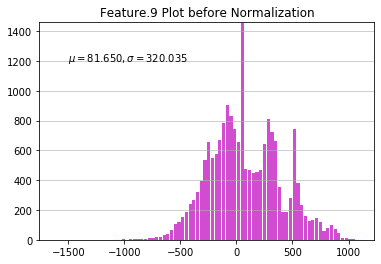

In [47]:
# Plot of Feature.9 with Linear Interpolated imputed dataset
n, bins, patches = plt.hist(x=dataA_SiMedianImputation[:, 8], bins='auto', color='m', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.title('Feature.9 Plot before Normalization')
plt.text(-1500,1200, r'$\mu=81.650 , \sigma= 320.035$')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq/10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 1960.0)

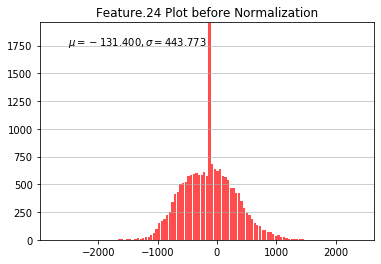

In [48]:
# Plot of Feature.24 with Linear Interpolated imputed dataset
n, bins, patches = plt.hist(x=dataA_SiMedianImputation[:, 23], bins='auto', color='r', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.text(-2500,1750, r'$\mu=-131.400, \sigma= 443.773$')
plt.title('Feature.24 Plot before Normalization')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq/10) * 10 if maxfreq % 10 else maxfreq + 10)

# Data Normalization
## 1. Max-Min Normalization

In [49]:
MMscaler = MinMaxScaler()
MMscaler.fit(dataA_SiMedianImputation)
data_normalizedMM = MMscaler.transform(dataA_SiMedianImputation)

In [50]:
print("\n Max-Min Normalized dataset: \n", data_normalizedMM)


 Max-Min Normalized dataset: 
 [[0.5575797  0.3747785  0.61027837 ... 0.48753915 0.40568244 0.34659603]
 [0.55823032 0.3765505  0.61027837 ... 0.48740297 0.40643919 0.34422904]
 [0.55606159 0.38009451 0.6106677  ... 0.48692632 0.40458173 0.34389089]
 ...
 [0.56907395 0.49202599 0.53922523 ... 0.48753915 0.40348101 0.34603246]
 [0.56907395 0.49202599 0.53922523 ... 0.48753915 0.40348101 0.34603246]
 [0.56907395 0.49202599 0.53922523 ... 0.48753915 0.40348101 0.34603246]]


In [51]:
print("Data of Feature.9: \n",data_normalizedMM[:,9])

Data of Feature.9: 
 [0.44391587 0.45092639 0.44616925 ... 0.54381572 0.54381572 0.54381572]


(0.0, 1460.0)

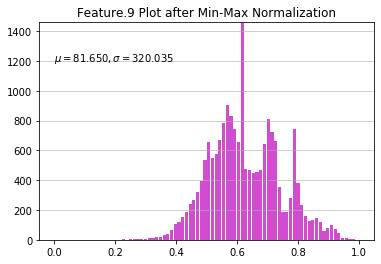

In [52]:
# Plot of Feature.9 with Linear Interpolated imputed dataset
n, bins, patches = plt.hist(x=data_normalizedMM[:, 8], bins='auto', color='m', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.title('Feature.9 Plot after Min-Max Normalization')
plt.text(0,1200, r'$\mu=81.650 , \sigma= 320.035$')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq/10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 1960.0)

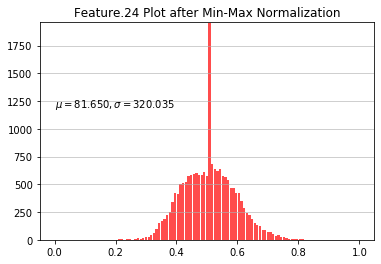

In [53]:
# Plot of Feature.24 with Linear Interpolated imputed dataset
n, bins, patches = plt.hist(x=data_normalizedMM[:, 23], bins='auto', color='r', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.title('Feature.24 Plot after Min-Max Normalization')
plt.text(0,1200, r'$\mu=81.650 , \sigma= 320.035$')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq/10) * 10 if maxfreq % 10 else maxfreq + 10)

## 2. Z-Score Normalization (Standardization)

In [54]:
# Z-Score Normalization
ss = StandardScaler()
ss.fit(dataA_SiMedianImputation)
dataA_standardised = ss.transform(dataA_SiMedianImputation)

In [55]:
print("Standardized Dataset: \n", dataA_standardised)

Standardized Dataset: 
 [[-0.08078445 -0.79866459  0.89282168 ... -0.01372297  0.06658956
   0.00749993]
 [-0.06988605 -0.78221499  0.89282168 ... -0.01634762  0.0899498
  -0.03960709]
 [-0.10621404 -0.7493158   0.89802871 ... -0.02553389  0.03261102
  -0.04633666]
 ...
 [ 0.11175386  0.28975022 -0.05746136 ... -0.01372297 -0.00136752
  -0.00371602]
 [ 0.11175386  0.28975022 -0.05746136 ... -0.01372297 -0.00136752
  -0.00371602]
 [ 0.11175386  0.28975022 -0.05746136 ... -0.01372297 -0.00136752
  -0.00371602]]


(0.0, 1460.0)

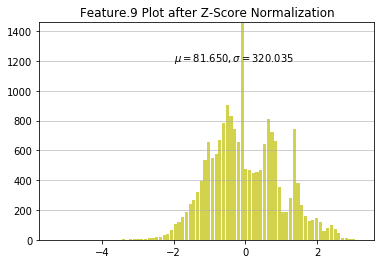

In [56]:
# Plot of Feature.9 with Linear Interpolated imputed dataset
n, bins, patches = plt.hist(x=dataA_standardised[:, 8], bins='auto', color='y', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.title('Feature.9 Plot after Z-Score Normalization')
plt.text(-2,1200, r'$\mu=81.650 , \sigma= 320.035$')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq/10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 1960.0)

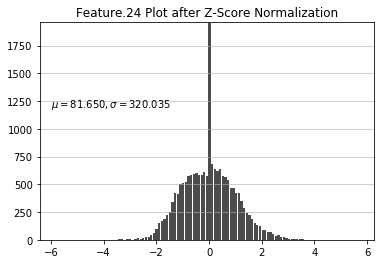

In [57]:
# Plot of Feature.24 with Linear Interpolated imputed dataset
n, bins, patches = plt.hist(x=dataA_standardised[:, 23], bins='auto', color='k', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.title('Feature.24 Plot after Z-Score Normalization')
plt.text(-6,1200, r'$\mu=81.650 , \sigma= 320.035$')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq/10) * 10 if maxfreq % 10 else maxfreq + 10)

## Analysis: 
#### From the plot generated before max min and z-score normalization the x-axis for the plot by feature.9 ranges from -1500 to 1000 and that of the feature.24 ranges from -2000 to 2000. After max-min normalization the range of the x-axis changes and it becomes normalized between 0 and 1 for both the plot for feature.9 and feature.24. Where the plot generated after Z-score normalization the x-range ranges from -4 to 4 for both the features. However there is no change in the y label of the plots before and after normalization for both max-min and z-score normalization.